In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
from pyspark.sql import SparkSession

In [4]:
os.chdir('..')
!pwd

/data/repos/gzreduction


In [5]:
working_dir = '../zoobot/data/decals/classifications/streaming'


In [6]:

df = pd.read_csv(os.path.join(working_dir, 'classifications.csv'))

In [7]:
df.head()

,subject_id,bar_no,bar_strong,bar_weak,bulge-size_dominant,bulge-size_large,bulge-size_moderate,bulge-size_none,bulge-size_small,disk-edge-on_no,...,bulge-size_dominant_fraction,merging_merger_fraction,merging_tidal-debris-v1_fraction,merging_both-v1_fraction,merging_neither-v1_fraction,merging_major-disturbance_fraction,merging_minor-disturbance_fraction,merging_none_fraction,iauname,subject_url
0,20925270,7,0,0,0,5,2,0,0,7,...,0.000000,0.129032,0.16129,0.290323,0.419355,0.000000,0.000000,0.000000,J112735.91-020514.9,https://panoptes-uploads.zooniverse.org/produc...
1,27363232,9,0,1,0,5,3,0,2,10,...,0.000000,0.472222,0.00000,0.000000,0.000000,0.055556,0.138889,0.333333,J095946.34+040001.3,https://panoptes-uploads.zooniverse.org/produc...
2,21663050,3,0,3,0,1,2,1,2,6,...,0.000000,0.000000,0.00000,0.000000,0.263158,0.052632,0.026316,0.657895,J011510.87-000659.8,https://panoptes-uploads.zooniverse.org/produc...
3,20926376,5,1,1,1,2,3,0,1,7,...,0.142857,0.485714,0.00000,0.114286,0.400000,0.000000,0.000000,0.000000,J115100.67-030435.0,https://panoptes-uploads.zooniverse.org/produc...
4,21661566,28,4,6,0,0,6,2,30,38,...,0.000000,0.075000,0.02500,0.050000,0.300000,0.125000,0.100000,0.325000,J123906.26-023029.5,https://panoptes-uploads.zooniverse.org/produc...


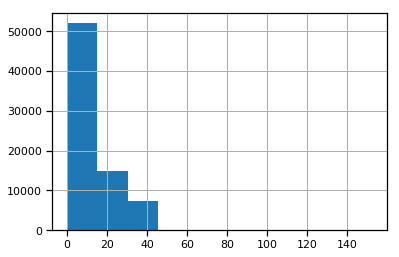

In [8]:
df['smooth-or-featured_featured-or-disk'].hist()

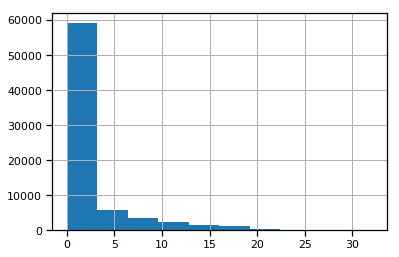

In [11]:
df['bar_weak'].hist()

<img src=}></img>

In [9]:
df.iloc[0]['subject_url']

'https://panoptes-uploads.zooniverse.org/production/subject_location/56a404e7-f94a-406a-9696-ce17c63d37d5.png'

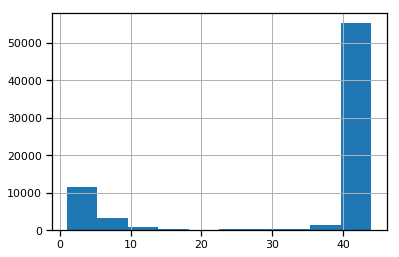

In [17]:
df[df['smooth-or-featured_total-votes'] < 45]['smooth-or-featured_total-votes'].hist()

In [19]:
df.columns.values

array(['subject_id', 'bar_no', 'bar_strong', 'bar_weak',
       'bulge-size_dominant', 'bulge-size_large', 'bulge-size_moderate',
       'bulge-size_none', 'bulge-size_small', 'disk-edge-on_no',
       'disk-edge-on_yes', 'edge-on-bulge_boxy', 'edge-on-bulge_none',
       'edge-on-bulge_rounded', 'has-spiral-arms_no',
       'has-spiral-arms_yes', 'how-rounded_cigar-shaped',
       'how-rounded_in-between', 'how-rounded_round', 'merging_both-v1',
       'merging_major-disturbance', 'merging_merger',
       'merging_minor-disturbance', 'merging_neither-v1', 'merging_none',
       'merging_tidal-debris-v1', 'smooth-or-featured_artifact',
       'smooth-or-featured_featured-or-disk', 'smooth-or-featured_smooth',
       'spiral-arm-count_1', 'spiral-arm-count_2', 'spiral-arm-count_3',
       'spiral-arm-count_4', 'spiral-arm-count_cant-tell',
       'spiral-arm-count_more-than-4', 'spiral-winding_loose',
       'spiral-winding_medium', 'spiral-winding_tight',
       'smooth-or-featured_tot

In [23]:
master = pd.read_csv(os.path.join(working_dir, '../../decals_master_catalog.csv'))

In [24]:
len(master)

334235

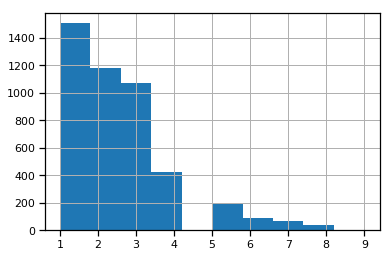

In [28]:
master[master['smooth-or-featured_total-votes'] < 10]['smooth-or-featured_total-votes'].hist()

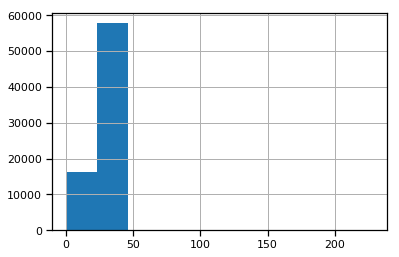

In [26]:
df[df['smooth-or-featured_total-votes'] < 45]['smooth-or-featured_total-votes'].hist()